# AmericanSurvey

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
#housing = pd.read_csv("data/pums/ss13husa.csv",usecols=('ST', 'FINCP'), nrows=1000)
population = pd.read_csv("data/pums/ss13pusa.csv",usecols=('SCHL', 'PINCP', 'SEX', 'NATIVITY'), nrows=5000)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.regplot(x="SCHL", y="PINCP", data=population, hue="SEX")

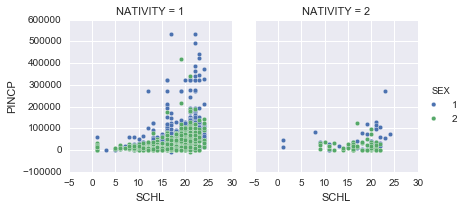

In [33]:
g = sns.FacetGrid(population, col='NATIVITY', hue="SEX")
g = (g.map(plt.scatter, "SCHL", "PINCP", edgecolor="w").add_legend())

In [35]:
def get_average_income_for_schooling(sex, nativity):
    incomes = housing[housing.ST == i].FINCP.values
    if (len(incomes > 0)):
        income_average = np.average(incomes[~np.isnan(incomes)])
    averaged = pd.DataFrame(columns=['SCHL', 'PINCP', 'NATIVITY', 'SEX'])
for 
#g = sns.FacetGrid(population, col='NATIVITY', hue="SEX")
#g = (g.map(plt.scatter, "SCHL", "PINCP", edgecolor="w").add_legend())

,SCHL,PINCP,NATIVITY,SEX
